# Proyecto Máquina Royal

## Objetivo

Dado el esquema del juego Casino Royal, una máquina de casino, se necesita encontrar el diseño de los 5 reels, o ruletas, del juego de tal forma que, en promedio, al corte de una semana el jugador haya ganado premios de un aproximado del 90 al 95% del total de ingresos de la máquina. 

## Descripción del problema

Podemos pensar los reels como una secuencia lineal de un número de cajas a determinar que en su interior tienen 11 figuras distintas. El número de figuras y el orden en el que están estas figuras también se tiene que determinar. 
El número de cajas y el orden de las figuras tienen que asegurar que, en promedio, después de una semana de actividad, el jugador haya obtenido premios de un aproximado del 90 al 95% de los ingresos de la máquina. El orden de las figuras y el número de cajas no tienen que ser iguales para todos los reels. 
Los 5 reels que hay en la maquina muestran 3 cajas cada uno y son independientes entre si. La posición del riel que salga visible en la máquina en medio determina las otras dos por estar ordenado, y podemos suponer que todas las posiciones de un riel son equiprobables de salir en medio. 
Podemos suponer que una semana de juego consta de 6 días. Cada día consta de 12 horas en las que la maquina se juega aleatoriamente, en promedio el 40% de este tiempo la maquina está siendo jugada. Un juego tarda alrededor de 20 segundos, aunque esto también es aleatorio.
Al principio de cada semana, la maquina cuenta con un fondo de entre 5,000 a 10,000 créditos. Si en cualquier momento del juego la maquina se queda sin fondos, la maquina no puede seguir operando.
Para que el juego de incentivos a las personas a seguir jugando se quiere que la probabilidad de que la maquina no de un premio en después de 10 juegos sea baja (menor al 20%).


## Descripción del juego

La dinámica del juego es:
1.	Una persona inserta una moneda. Cada moneda te da 10 créditos que puedes distribuir en distintas apuestas
2.	Después de elegir tus apuestas, comienzas el juego. Esto causa que los reels corran aleatoriamente y arrojen distintas figuras
3.	Según las figuras que saca el juego y las apuestas hechas dan como premio una cantidad de créditos o pierdes.
El juego consta de 5 reels en pantalla, cada reel muestra 3 cajas en todo momento y en cada reel hay una combinación de 11 figuras distintas.
En el juego apuestas créditos a la forma en las que te pueden salir las distintas figuras. Se presenta la imagen de las distintas combinaciones en las que puedes apostar <img src="img/lines.png" width="300">

Si apostaste de tal forma que el resultado de los reels al final del juego conecte una cantidad de figuras iguales, ordenadas de izquierda a derecha, ganas. El número de figuras que necesitas para ganar y el monto que ganas varían según la figura. En la imagen presentada a continuación se muestran los premios (el número) y la cantidad de figuras necesarias para cada premio (el multiplicador). <img src="img/paytable.png" width="300">

Es posible apostar más de un crédito y a más de una forma. El resultado de la maquina es acumulable. Si apostaste de tal forma que ganaste de dos formas distintas, se suma el premio de ambos.

Un ejemplo, si apostaste únicamente un crédito a la forma 1 y te salen 3 cerezas conectadas de izquierda a derecha, el resultado es que ganas 5 créditos. Si salen 3 cerezas que no son continuas de izquierda a derecha en la línea de en medio, pierdes.

Por último, el Jackpot es una canasta inicial que a lo largo del juego va incrementando linealmente. Existen distintos jackpots con distintos premios iniciales: El JP1 es de 20,000, El JP 2 es de 10,000 y el JP 3 es de 5,000. Cada juego se acumula 1/400 de crédito en todos los JP. Cuando se gana el JP en cualquier momento, el acumulado regresa a cero y empieza a correr otra vez.

## Análisis probabilístico

El factor del jackpot hace que este sea un proceso estocástico. Primero analicemos cuántos juegos habrá en alrededor una semana. Estamos suponiendo que un juego tarda alrededor de 20 segundos, por lo que se pueden jugar alrededor de 180 juegos por hora. Como suponemos que la máquina podrá ser utilizada 12 horas en un día, y la máquina estará siendo utilizada un 40% de este tiempo, la máquina podrá estar siendo utilizada alrededor de 4.8 horas al día, dando un total de 810 juegos en un día. Entonces podemos suponer que habrá alrededor de 4860 juegos en una semana, o 5000 juegos, por simplicidad. 

El acumulado del jackpot sube 1/400 por juego. Incluso si consideramos a muy largo plazo como un año, habría en total 260,000 juegos, lo que subiría el acumulado del jackpot en 650, lo cual no es mucho. Por ello, para simplificar en un inicio el análisis probabilístico, supondremos que no existe este acumulado. Si logramos obtener rieles que de manera teórica logren dar a los jugadores en valor esperado un 90% - 95% de los créditos que ingresen, entonces estos serán buenos candidatos para el juego original, y podremos comprobar esto simulando solo unos cuantos rieles como propuestas juntos con las otras métricas que nos interesan. 

Ignorando el factor del jackpot, la ganancia posible en un juego es idéntico a las ganancias posibles en juegos sucesivos. Dado un vector de apuestas $(a_1, a_2, ..., a_9)$, sea $Y$ la variable aleatoria que nos dice la ganancia de un jugador después de jugar una vez en la máquina poniendo como apuestas $a_i$ créditos a la línea $i$. Luego, queremos encontrar una propuesta de rieles que garanticen que $E[\frac{Y}{a_1 + a_2 + \ldots + a_9}] \in [.9, .95]$ para cualquier elección de apuestas. 

La ganancia de un jugador en una máquina la podemos descomponer en las ganancias dadas por cada apuesta a cada línea, pues los premios se acumulan por línea. Es decir, si nombramos como $X_i$ a la variable aleatoria que nos dice la ganancia de un jugador al jugar un juego en la máquina tragamonedas apostando 1 crédito a la línea $i$, entonces $Y = a_1X_1 + a_2X_2 + \ldots + a_9X_9$. De aquí se sigue que:

\begin{equation}
E\bigg[\frac{Y}{a_1 + a_2 + \ldots + a_9}\bigg] = E\bigg[\frac{a_1X_1 + a_2X_2 + \ldots + a_9X_9}{a_1 + a_2 + \ldots + a_9}\bigg] = \frac{a_1E[X_1] + a_2E[X_2] + \ldots + a_9E[X_9]}{a_1 + a_2 + \ldots + a_9}
\end{equation}

donde la última igualdad se sigue de la linearidad de la esperanza. Luego nos interesa obtener el valor esperado de ganancias de un jugador en un juego para cada línea dado ciertos rieles. 

Supondremos por simplicidad que cada riel es del mismo tamaño, pero el siguiente análisis es igualmente válido con rieles de distintos tamaños. Supongamos que los 5 rieles son de tamaño $N$ y los representamos con los vectores $r_1, r_2, r_3, r_4$ y $r_5$ de tal manera que $r_{i, j} \in \{"cereza", "campana", "bar", \ldots \}$ (el conjunto de figuras utilizado). Como en cada juego cualquier posición de cada riel es equiprobable y los rieles son independientes entre sí, podemos pensar el juego como una realización de 5 variables aleatorias independientes uniformes discretas $U_1, \ldots, U_5$ de los números del 0 al $N - 1$. Sea $I_N = \{0, 1, \ldots, N-1 \}$ y sea $f(i, j, k, l, m)$ la función que nos dice cuánto gana el jugador si consideramos las figuras dadas por $r_{1,i}, r_{2,j}, r_{3,k}, r_{4,l}, r_{5,m}$. Luego podemos calcular la esperanza de la variable aleatoria $X_1$ como:

\begin{equation}
E\big[X_1\big] = \sum_{(i, j, k, l, m) \in {I_N}^{5}}^{}P(U_1 = i, U_2 = j, U_3 = k, U_4 = l, U_5 = m)f(i, j, k, l, m) = \sum_{(i, j, k, l, m) \in {I_N}^{5}}^{}\frac{f(i, j, k, l, m)}{N^5}
\end{equation}

donde la primera igualdad sale de la definición de esperanza y la segunda de que son variables aleatorias uniformes discretas independientes. Notemos que estamos iterando sobre todos los elementos de ${I_N}^5$, la iteración que ponemos en el sumando respecto a cada variable, realmente no importa mucho mientras aparezca exactamente una vez cada número del 0 a $N - 1$. Luego otra manera de iterar sobre ${I_N}^5$ es la siguiente:

\begin{equation}
\sum_{(i, j, k, l, m) \in {I_N}^{5}}^{}\frac{f(i, j, k, l, m)}{N^5}  = \sum_{(i, j, k, l, m) \in {I_N}^{5}}^{}\frac{f((i + t_1) \% N, (j + t_2) \% N, (k + t_3) \% N, (l + t_4) \% N, (m + t_5)) % N}{N^5}
\end{equation}

en donde $t_1, t_2, \ldots, t_5$ son constantes enteras y $\%$ representa la operación módulo. Esta última igualdad es importante, porque con ciertas elecciones correctas de $t_1, t_2, \ldots, t_5$, podemos ver que jugar en una línea, es como una traslación de jugar en otra línea, y cuando consideramos todas las posibilidades, ambas tienes el mismo valor esperado por considerar todas las posibilidades. Por ejemplo con la línea 5:
\begin{equation}
E\big[X_5\big] = \sum_{(i, j, k, l, m) \in {I_N}^{5}}^{}\frac{f((i-1) \% N, j \% N, (k+1) \% N, l, (m-1) \% N)}{N^5} = E\big[X_1\big] 
\end{equation}

Luego $E[E_i] = E[X_1]$ para todo $i$. Esto nos sirve mucho para simplificar los cálculos de la esperanza del juego, porque lo que nos dice es que todas las líneas son realmente equivalente en cuanto a valor esperado en ganancia, y en particular:

\begin{equation}
E\bigg[\frac{Y}{a_1 + a_2 + \ldots + a_9}\bigg] = \frac{a_1E[X_1] + a_2E[X_2] + \ldots + a_9E[X_9]}{a_1 + a_2 + \ldots + a_9} = \frac{a_1E[X_1] + a_2E[X_1] + \ldots + a_9E[X_1]}{a_1 + a_2 + \ldots + a_9} = \frac{(a_1 + a_2 + \ldots + a_9)E[X_1]}{a_1 + a_2 + \ldots + a_9} = E\big[X_1\big]
\end{equation}

Es decir, el valor esperado del porcentaje de ganancia de un jugador no depende de la cantidad que un jugador apueste a cada línea, sino que es el mismo al porcentaje de ganancia de un jugar apostando un crédito a la línea 1. Esto nos sirve porque es una condición mucho más restringida y fácil de operar para encontrar rieles que cumplan esto. Por otro lado, esto no significa que no haya impacto en el juego de acuerdo a las apuestas cómo se decidan, solo significa que no tiene impacto en este valor esperado. Por otro lado por ejemplo, estos resultados no son ciertos para la varianza del porcentaje de ganancia, pues la varianza no es un operador lineal y no se tiene independencia entre las líneas. Además, entre más grande sean las apuestas que haga un jugador esto también resulta en mayores varianzas. 

## Metodología para encontrar los rieles motivado por el análisis probabilístico

Calcular el valor esperado exacto o simulado de $Y$ toma mucho tiempo por las distintas combinaciones que pueden haber aunque se consideren incluso un número no muy grande de figuras en los rieles. Tomando partida de que es equivalente calcular el valor esperado de $X_1$, ese sí es posible obtenerlo de manera teórica eficientemente con un programa de computadora. Además, como se vio en el análisis probabilístico que la esperanza es iterar sobre todo ${I_N}^5$, uno se puede dar cuenta que entonces para el valor esperado realmente lo que nos interesa es cuántas veces aparece cada figura en cada riel, pues su orden es irrelevante. Esto es de utilidad para no tener que evaluar tantos rieles repetidos al momento de querer encontrar uno con cierta esperanza. Sin embargo, esto no significa que el orden no importa en general, pues de acuerdo al orden podemos generar más dependencia entre líneas y esto tiene impacto sobre la varianza.  

Luego, lo que se hará es probar distintos rieles, y solo quedarnos con los que den valor esperado en el rango querido para así poder hacer un rápido descarte de muchos rieles que no nos interesan. Luego se harán simulaciones del juego sobre los rieles restantes propuestos y de acuerdo a los resultados de las simulaciones en los que sí consideramos las demás métricas, uno puede decidir si hay alguno que le parezca satisfactorio. 

## Código para la selelección de rieles

En esta sección se importa lo necesario

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(12345) # Esto es para tener siempre la misma simulación y se puedan replicar los mismos resultados

Aquí se define la clase máquina tragamonedas, la cual tiene la funcionalidad de la máquina descrita

In [2]:
class SlotMachine:
    def __init__(self, reels, payTable, initialCredit, jprate):
        self.reels = reels # Los rieles que contiene esta máquina
        self.payTable = payTable # La tabla de premios de la máquina
        self.jprate = jprate # La tasa de incremento del acumulado del jackpot
        self.t = 0 # El número de juegos que ha habido en la máquina sin dar el premio jackpot
        self.credit = initialCredit # Los créditos con los que cuenta la máquina al inicio
        self.linesT = np.array([
            [0,0,0,0,0],
            [-1,-1,-1,-1,-1],
            [1,1,1,1,1],
            [-1,0,1,0,-1],
            [1,0,-1,0,1],
            [0,1,1,1,0],
            [0,-1,-1,-1,0],
            [1,1,0,-1,-1],
            [-1,-1,0,1,1],
        ]) # Un vector de transformaciones para representar las distintas líneas en las que se puede jugar en la máquina
        
    def payout(self, pos): 
        for i in range(4):
            if (self.reels[0][pos[0]] != self.reels[i + 1][pos[i + 1]]):
                if (self.reels[0][pos[0]] == "JP" and i > 1):
                    self.t = 0
                    return self.payTable["JP"][i] + self.jprate*self.t
                
                return self.payTable[self.reels[0][pos[0]]][i]
        
        if (self.reels[0][pos[0]] == "JP"):
            self.t = 0
            return self.payTable["JP"][4] + self.jprate*self.t
        
        return self.payTable[self.reels[0][pos[0]]][4]
    
    def spin(self, bet):
        prize = 0
        pos = np.zeros(5, dtype=int)
        MOD = np.zeros(5, dtype=int)
        for i in range(5):
            pos[i] = np.random.randint(len(self.reels[i]))
            MOD[i] = len(self.reels[i])
        
        for i in range(9):
            self.credit += bet[i]
            prize += bet[i] * self.payout(np.mod(pos + self.linesT[i], MOD))
        
        self.credit -= prize
        self.t += 1
        return prize

Clase que representa a una persona jugando. Si bien independientemente de las apuestas que se hagan en una máquina el valor esperado de la ganancia es el mismo, el comportamiento del jugador en cuanto su apuesta tendrá repercusión sobre la varianza. Estos modelos de jugador nos pueden servir para al hacer la simulacón podamos contrastar como se ven las ganancias de los jugadores aunque sigan distintos comportamientos de apuestas.

In [3]:
class Player:
    def makeBet(self):
        pass
    
    def play(self, slotMachine):
        bet = self.makeBet()
        prize = slotMachine.spin(bet)
        return np.sum(bet), prize

class OneLinePlayer(Player):
    def __init__(self, bet):
        self.bet = bet
    
    def makeBet(self):
        return np.array([self.bet, 0, 0, 0, 0, 0, 0, 0, 0])
        
class MultipleLinePlayer(Player):
    def __init__(self, bet):
        self.bet = bet
    
    def makeBet(self):
        return np.full(9, self.bet, dtype=int)

class randomPlayer(Player):
    def __init__(self, maxbet):
        self.maxbet = maxbet
    
    def makeBet(self):
        return np.random.randint(maxbet, size = 9)    

Datos recibidos para esta máquina

In [4]:
paytable = {
    "cereza" : np.array([0, 0, 5, 20, 100]),
    "naranja": np.array([0, 0, 5, 20, 100]),
    "limon" : np.array([0, 0, 5, 20, 100]),
    "sandia" : np.array([0, 0, 10, 40, 100]),
    "campana" : np.array([0, 0, 10, 40, 100]),
    "bar": np.array([0, 5, 15, 65, 250]),
    "JP" : np.array([0, 0, 5000, 10000, 20000]),
    "barbar" : np.array([0, 5, 25, 100, 500]),
    "barbarbar": np.array([0, 5, 30, 200, 1000]),
    "estrella" : np.array([0, 0, 18, 135, 450]),
    "joker" : np.array([0, 10, 80, 1000, 5000]), 
}

figures = ["JP", "joker", "barbarbar", "barbar", "bar", "estrella", "sandia", "campana", "cereza", "limon", "naranja"]

#### Código para obtener las primeras propuestas de rieles

In [5]:
# función que calcula la esperanza del porcentaje de ganancia de un jugador jugando con un crédito a la línea 1
def optimizedExpectedPayoutPercentage(slotmachine):
    cntFigs = {}
    cnt = np.zeros(5, dtype=int)
    for fig in slotmachine.payTable:
        cntFigs[fig] = np.zeros(5, dtype=int)
    for i in range(5):
        cnt[i] = len(slotmachine.reels[i])
        for j in range(cnt[i]):
            cntFigs[slotmachine.reels[i][j]][i] += 1
    
    ans = 0
    for fig in slotmachine.payTable:
        ans += slotmachine.payTable[fig][0] * (cntFigs[fig][0] * (cnt[1] - cntFigs[fig][1]) * cnt[2] * cnt[3] * cnt[4])
        ans += slotmachine.payTable[fig][1] * (cntFigs[fig][0] * cntFigs[fig][1] * (cnt[2] - cntFigs[fig][2]) * cnt[3] * cnt[4])
        ans += slotmachine.payTable[fig][2] * (cntFigs[fig][0] * cntFigs[fig][1] * cntFigs[fig][2] * (cnt[3] - cntFigs[fig][3]) * cnt[4])
        ans += slotmachine.payTable[fig][3] * (cntFigs[fig][0] * cntFigs[fig][1] * cntFigs[fig][2] * cntFigs[fig][3] * (cnt[4] - cntFigs[fig][4]))
        ans += slotmachine.payTable[fig][4] * (cntFigs[fig][0] * cntFigs[fig][1] * cntFigs[fig][2] * cntFigs[fig][3] * cntFigs[fig][4])
    
    return (ans * 100)/(cnt[0] * cnt[1] * cnt[2] * cnt[3] * cnt[4])

En la siguiente función se encuentran propuestas de acuerdo al número máximo de figuras que se quiera considerar de cada tipo y de acuerdo al rango en el que se quiere el valor esperado del porcentaje de ganancias del jugador. 
En esta se supone que todos los rieles tienen la misma cantidad de cada figura por simplicidad. Además,
para eliminar algo de la dependencia entre rieles se toma una permutación aleatoria de este acomodo de figuras.

In [6]:
def findProposedReels(maxJP, maxJoker, maxBarBarBar, maxBarBar, maxBar, maxEstrella, maxSandia, maxCereza, minpp, maxpp):
    combs = [(i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9, i_10, i_11)
               for i_1 in range(1, maxJP + 1)
               for i_2 in range(1, maxJoker + 1)
               for i_3 in range(1, maxBarBarBar + 1)
               for i_4 in range(1, maxBarBar + 1)
               for i_5 in range(1, maxBar + 1)
               for i_6 in range(1, maxEstrella + 1)
               for i_7 in range(1, maxSandia + 1)
               for i_8 in range(i_7, i_7 + 1)
               for i_9 in range(1, maxCereza + 1)
               for i_10 in range(i_9, i_9 + 1)
               for i_11 in range(i_9, i_9 + 1)]
    
    propReel = []
    
    t = 0
    p = 0
    for comb in combs:
        t += 1
        reel = []
        for i in range(len(comb)):
            for j in range(comb[i]):
                reel.append(figures[i])
        
        reels = [np.random.permutation(reel), np.random.permutation(reel), np.random.permutation(reel), np.random.permutation(reel), np.random.permutation(reel)]
        machine = SlotMachine(reels, paytable, 0, 0)
        
        exp_pp = optimizedExpectedPayoutPercentage(machine)
        
        if (minpp < exp_pp and exp_pp < maxpp):
            propReel.append((reels, exp_pp))
        
        while (t/len(combs) - p >= -.01):
            print("Se ha completado el {} porciento de los rieles propuestos".format(p * 100))
            p += .05 
    
    return propReel

In [7]:
propReels = findProposedReels(1, 3, 3, 3, 3, 5, 6, 8, 88, 92)

Se ha completado el 0 porciento de los rieles propuestos
Se ha completado el 5.0 porciento de los rieles propuestos
Se ha completado el 10.0 porciento de los rieles propuestos
Se ha completado el 15.000000000000002 porciento de los rieles propuestos
Se ha completado el 20.0 porciento de los rieles propuestos
Se ha completado el 25.0 porciento de los rieles propuestos
Se ha completado el 30.0 porciento de los rieles propuestos
Se ha completado el 35.0 porciento de los rieles propuestos
Se ha completado el 40.0 porciento de los rieles propuestos
Se ha completado el 44.99999999999999 porciento de los rieles propuestos
Se ha completado el 49.99999999999999 porciento de los rieles propuestos
Se ha completado el 54.99999999999999 porciento de los rieles propuestos
Se ha completado el 60.0 porciento de los rieles propuestos
Se ha completado el 65.0 porciento de los rieles propuestos
Se ha completado el 70.0 porciento de los rieles propuestos
Se ha completado el 75.00000000000001 porciento de 

#### Código para obtener más información de los rieles propuestos via simulación

In [8]:
# Función que simula nsims veces a un jugador jugando en una máquina T juegos
def simulate(slotMachine, initialCredit, player, T, nsims):
    creditSpent = np.zeros(nsims)
    creditRewarded = np.zeros(nsims)
    payoutPercentage = np.zeros(nsims)
    machineCreditHistory = np.zeros((nsims, T + 1))
    pOfWinningSomething = np.zeros(nsims)
    pOfWinningMoreThanBet = np.zeros(nsims)
    pOfRunningOutOfCredits = 0
    
    for i in range(nsims):
        machineCreditHistory[i][0] = initialCredit
        slotMachine.credit = initialCredit
        slotMachine.t = 0
        ngames = T
        
        for t in range(T):
            bet, prize = player.play(slotMachine)
            # print("In game {} player bet {} and won {}".format(t+1, bet, prize))
            creditSpent[i] += bet
            creditRewarded[i] += prize
            machineCreditHistory[i][t + 1] = slotMachine.credit
            pOfWinningSomething[i] += prize > 0
            pOfWinningMoreThanBet[i] += prize > bet
            if (slotMachine.credit < 0):
                pOfRunningOutOfCredits += 1
                machineCreditHistory[i][(t+1): ] = slotMachine.credit
                ngames = t + 1
                break
            
        payoutPercentage[i] = creditRewarded[i]/creditSpent[i] * 100
        pOfWinningSomething[i] = np.sum(pOfWinningSomething[i])/ngames
        pOfWinningMoreThanBet[i] = np.sum(pOfWinningMoreThanBet[i])/ngames
    
    payoutPercentageEstimate = np.mean(payoutPercentage)
    payoutPercentageVariance = np.var(payoutPercentage)
    pOfWinningSomethingEstimate = np.mean(pOfWinningSomething)
    pOfWinningMoreThanBetEstimate = np.mean(pOfWinningMoreThanBet)
    pOfRunningOutOfCreditsEstimate =  np.mean(pOfRunningOutOfCredits)
    
    return payoutPercentageEstimate, payoutPercentageVariance, machineCreditHistory, pOfWinningSomethingEstimate, pOfWinningMoreThanBetEstimate, pOfRunningOutOfCreditsEstimate

In [9]:
# Función que da un resumen de las métricas queridas dado ciertos rieles
def simulationSummary(reels, pp, machineInitialCredit, nspins, nsims):
    print("Los rieles propuestos son: {}".format(reels))
    print("y tienen un payout percentage esperado de {}".format(pp))
    machine = SlotMachine(reels, paytable, machineInitialCredit, 1/400)
    player = OneLinePlayer(1)
    st = time.time()
    data = simulate(machine, machineInitialCredit, player, nspins, nsims)
    print("La simulación tardó {} segundos".format(time.time() - st))
    print("El payout percentage simulado es {} con varianza {}".format(data[0], data[1]))
    T = np.arange(nspins + 1)
    for i in range(nsims):
        plt.plot(T, data[2][i])
    
    plt.show()    

hay 336 rieles propuestos
Los rieles propuestos son: [array(['limon', 'cereza', 'naranja', 'campana', 'limon', 'estrella',
       'cereza', 'joker', 'naranja', 'bar', 'cereza', 'barbar', 'cereza',
       'naranja', 'JP', 'estrella', 'limon', 'limon', 'naranja',
       'barbarbar', 'sandia'], 
      dtype='<U9'), array(['cereza', 'limon', 'sandia', 'barbar', 'JP', 'cereza', 'cereza',
       'limon', 'estrella', 'joker', 'naranja', 'barbarbar', 'bar',
       'estrella', 'cereza', 'naranja', 'limon', 'limon', 'naranja',
       'naranja', 'campana'], 
      dtype='<U9'), array(['cereza', 'naranja', 'naranja', 'naranja', 'limon', 'cereza', 'JP',
       'barbarbar', 'limon', 'estrella', 'sandia', 'cereza', 'estrella',
       'joker', 'limon', 'barbar', 'naranja', 'limon', 'bar', 'cereza',
       'campana'], 
      dtype='<U9'), array(['cereza', 'estrella', 'limon', 'sandia', 'joker', 'naranja',
       'campana', 'JP', 'cereza', 'barbar', 'limon', 'cereza', 'naranja',
       'limon', 'bar', '

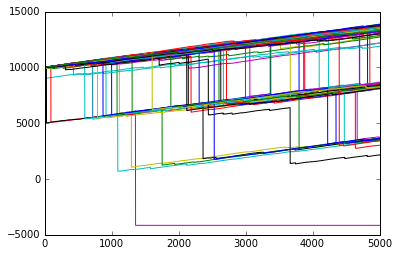

Los rieles propuestos son: [array(['limon', 'cereza', 'naranja', 'campana', 'limon', 'estrella',
       'cereza', 'joker', 'naranja', 'bar', 'cereza', 'barbar', 'cereza',
       'naranja', 'JP', 'estrella', 'limon', 'limon', 'naranja',
       'barbarbar', 'sandia'], 
      dtype='<U9'), array(['cereza', 'limon', 'sandia', 'barbar', 'JP', 'cereza', 'cereza',
       'limon', 'estrella', 'joker', 'naranja', 'barbarbar', 'bar',
       'estrella', 'cereza', 'naranja', 'limon', 'limon', 'naranja',
       'naranja', 'campana'], 
      dtype='<U9'), array(['cereza', 'naranja', 'naranja', 'naranja', 'limon', 'cereza', 'JP',
       'barbarbar', 'limon', 'estrella', 'sandia', 'cereza', 'estrella',
       'joker', 'limon', 'barbar', 'naranja', 'limon', 'bar', 'cereza',
       'campana'], 
      dtype='<U9'), array(['cereza', 'estrella', 'limon', 'sandia', 'joker', 'naranja',
       'campana', 'JP', 'cereza', 'barbar', 'limon', 'cereza', 'naranja',
       'limon', 'bar', 'naranja', 'barbarbar', 'li

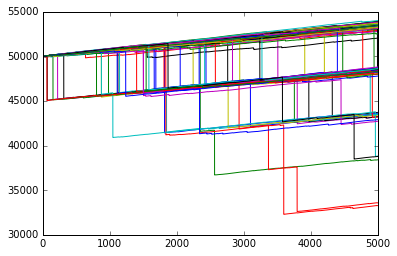

Los rieles propuestos son: [array(['JP', 'estrella', 'campana', 'bar', 'limon', 'cereza', 'limon',
       'cereza', 'naranja', 'campana', 'naranja', 'estrella', 'limon',
       'cereza', 'barbarbar', 'barbar', 'sandia', 'sandia', 'naranja',
       'joker'], 
      dtype='<U9'), array(['limon', 'barbarbar', 'bar', 'joker', 'JP', 'estrella', 'limon',
       'estrella', 'sandia', 'barbar', 'cereza', 'sandia', 'campana',
       'cereza', 'cereza', 'naranja', 'limon', 'naranja', 'naranja',
       'campana'], 
      dtype='<U9'), array(['campana', 'estrella', 'sandia', 'barbar', 'naranja', 'bar', 'JP',
       'naranja', 'barbarbar', 'limon', 'cereza', 'naranja', 'cereza',
       'limon', 'joker', 'limon', 'campana', 'sandia', 'estrella', 'cereza'], 
      dtype='<U9'), array(['limon', 'naranja', 'naranja', 'limon', 'campana', 'joker', 'limon',
       'cereza', 'cereza', 'sandia', 'bar', 'campana', 'estrella',
       'barbar', 'sandia', 'JP', 'barbarbar', 'naranja', 'cereza',
       'estrella

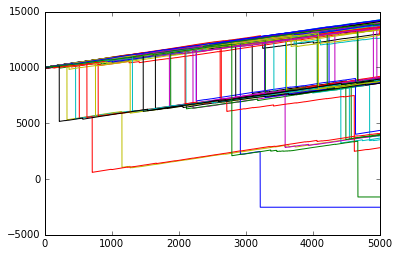

Los rieles propuestos son: [array(['JP', 'estrella', 'campana', 'bar', 'limon', 'cereza', 'limon',
       'cereza', 'naranja', 'campana', 'naranja', 'estrella', 'limon',
       'cereza', 'barbarbar', 'barbar', 'sandia', 'sandia', 'naranja',
       'joker'], 
      dtype='<U9'), array(['limon', 'barbarbar', 'bar', 'joker', 'JP', 'estrella', 'limon',
       'estrella', 'sandia', 'barbar', 'cereza', 'sandia', 'campana',
       'cereza', 'cereza', 'naranja', 'limon', 'naranja', 'naranja',
       'campana'], 
      dtype='<U9'), array(['campana', 'estrella', 'sandia', 'barbar', 'naranja', 'bar', 'JP',
       'naranja', 'barbarbar', 'limon', 'cereza', 'naranja', 'cereza',
       'limon', 'joker', 'limon', 'campana', 'sandia', 'estrella', 'cereza'], 
      dtype='<U9'), array(['limon', 'naranja', 'naranja', 'limon', 'campana', 'joker', 'limon',
       'cereza', 'cereza', 'sandia', 'bar', 'campana', 'estrella',
       'barbar', 'sandia', 'JP', 'barbarbar', 'naranja', 'cereza',
       'estrella

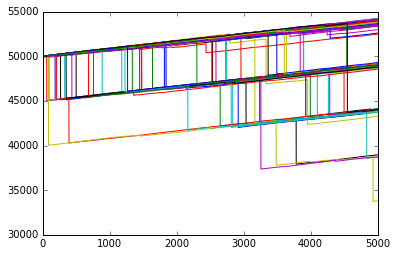

Los rieles propuestos son: [array(['estrella', 'joker', 'naranja', 'JP', 'estrella', 'sandia', 'limon',
       'sandia', 'limon', 'sandia', 'bar', 'sandia', 'campana', 'campana',
       'estrella', 'barbar', 'cereza', 'barbarbar', 'cereza', 'campana',
       'campana', 'naranja'], 
      dtype='<U9'), array(['limon', 'campana', 'cereza', 'barbar', 'sandia', 'estrella',
       'sandia', 'estrella', 'naranja', 'naranja', 'cereza', 'barbarbar',
       'campana', 'sandia', 'estrella', 'limon', 'campana', 'bar',
       'campana', 'joker', 'sandia', 'JP'], 
      dtype='<U9'), array(['campana', 'campana', 'sandia', 'sandia', 'campana', 'sandia',
       'barbarbar', 'cereza', 'sandia', 'limon', 'estrella', 'cereza',
       'JP', 'campana', 'joker', 'estrella', 'bar', 'naranja', 'limon',
       'barbar', 'naranja', 'estrella'], 
      dtype='<U9'), array(['barbarbar', 'cereza', 'sandia', 'barbar', 'estrella', 'cereza',
       'joker', 'estrella', 'limon', 'naranja', 'campana', 'JP', 'campana',

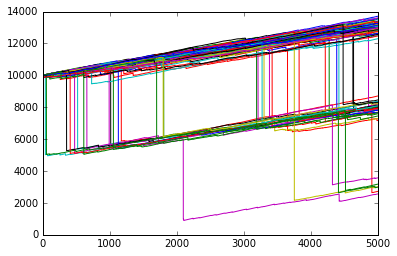

Los rieles propuestos son: [array(['estrella', 'joker', 'naranja', 'JP', 'estrella', 'sandia', 'limon',
       'sandia', 'limon', 'sandia', 'bar', 'sandia', 'campana', 'campana',
       'estrella', 'barbar', 'cereza', 'barbarbar', 'cereza', 'campana',
       'campana', 'naranja'], 
      dtype='<U9'), array(['limon', 'campana', 'cereza', 'barbar', 'sandia', 'estrella',
       'sandia', 'estrella', 'naranja', 'naranja', 'cereza', 'barbarbar',
       'campana', 'sandia', 'estrella', 'limon', 'campana', 'bar',
       'campana', 'joker', 'sandia', 'JP'], 
      dtype='<U9'), array(['campana', 'campana', 'sandia', 'sandia', 'campana', 'sandia',
       'barbarbar', 'cereza', 'sandia', 'limon', 'estrella', 'cereza',
       'JP', 'campana', 'joker', 'estrella', 'bar', 'naranja', 'limon',
       'barbar', 'naranja', 'estrella'], 
      dtype='<U9'), array(['barbarbar', 'cereza', 'sandia', 'barbar', 'estrella', 'cereza',
       'joker', 'estrella', 'limon', 'naranja', 'campana', 'JP', 'campana',

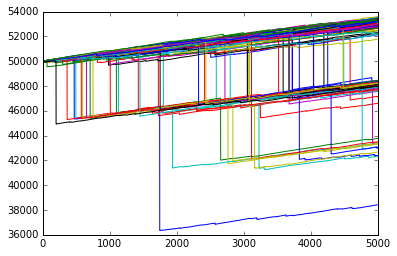

Los rieles propuestos son: [array(['campana', 'estrella', 'barbarbar', 'limon', 'campana', 'barbar',
       'estrella', 'sandia', 'cereza', 'JP', 'cereza', 'campana',
       'naranja', 'limon', 'sandia', 'sandia', 'joker', 'campana',
       'campana', 'bar', 'sandia', 'naranja', 'sandia', 'estrella',
       'sandia', 'campana'], 
      dtype='<U9'), array(['naranja', 'sandia', 'estrella', 'cereza', 'JP', 'estrella',
       'limon', 'estrella', 'sandia', 'barbar', 'campana', 'sandia',
       'joker', 'sandia', 'sandia', 'bar', 'campana', 'campana',
       'barbarbar', 'campana', 'campana', 'campana', 'limon', 'cereza',
       'sandia', 'naranja'], 
      dtype='<U9'), array(['joker', 'estrella', 'sandia', 'sandia', 'cereza', 'estrella',
       'naranja', 'estrella', 'campana', 'campana', 'JP', 'campana',
       'sandia', 'sandia', 'bar', 'barbarbar', 'sandia', 'campana',
       'campana', 'limon', 'barbar', 'naranja', 'sandia', 'limon',
       'cereza', 'campana'], 
      dtype='<U9'), 

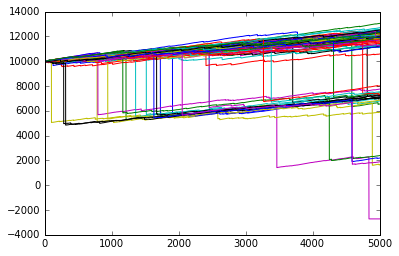

Los rieles propuestos son: [array(['campana', 'estrella', 'barbarbar', 'limon', 'campana', 'barbar',
       'estrella', 'sandia', 'cereza', 'JP', 'cereza', 'campana',
       'naranja', 'limon', 'sandia', 'sandia', 'joker', 'campana',
       'campana', 'bar', 'sandia', 'naranja', 'sandia', 'estrella',
       'sandia', 'campana'], 
      dtype='<U9'), array(['naranja', 'sandia', 'estrella', 'cereza', 'JP', 'estrella',
       'limon', 'estrella', 'sandia', 'barbar', 'campana', 'sandia',
       'joker', 'sandia', 'sandia', 'bar', 'campana', 'campana',
       'barbarbar', 'campana', 'campana', 'campana', 'limon', 'cereza',
       'sandia', 'naranja'], 
      dtype='<U9'), array(['joker', 'estrella', 'sandia', 'sandia', 'cereza', 'estrella',
       'naranja', 'estrella', 'campana', 'campana', 'JP', 'campana',
       'sandia', 'sandia', 'bar', 'barbarbar', 'sandia', 'campana',
       'campana', 'limon', 'barbar', 'naranja', 'sandia', 'limon',
       'cereza', 'campana'], 
      dtype='<U9'), 

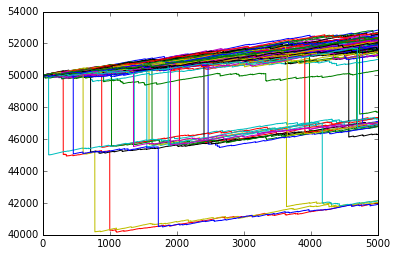

Los rieles propuestos son: [array(['joker', 'JP', 'estrella', 'naranja', 'barbar', 'estrella', 'limon',
       'limon', 'limon', 'cereza', 'estrella', 'cereza', 'bar', 'cereza',
       'campana', 'naranja', 'sandia', 'estrella', 'barbarbar', 'limon',
       'cereza', 'naranja', 'naranja'], 
      dtype='<U9'), array(['naranja', 'estrella', 'estrella', 'limon', 'naranja', 'cereza',
       'barbarbar', 'limon', 'naranja', 'campana', 'bar', 'estrella',
       'cereza', 'JP', 'sandia', 'limon', 'cereza', 'naranja', 'joker',
       'estrella', 'barbar', 'limon', 'cereza'], 
      dtype='<U9'), array(['estrella', 'cereza', 'limon', 'naranja', 'estrella', 'bar',
       'estrella', 'JP', 'limon', 'naranja', 'naranja', 'barbarbar',
       'limon', 'campana', 'sandia', 'limon', 'estrella', 'joker',
       'cereza', 'barbar', 'cereza', 'naranja', 'cereza'], 
      dtype='<U9'), array(['cereza', 'estrella', 'cereza', 'barbar', 'bar', 'limon',
       'estrella', 'limon', 'estrella', 'limon', 'barba

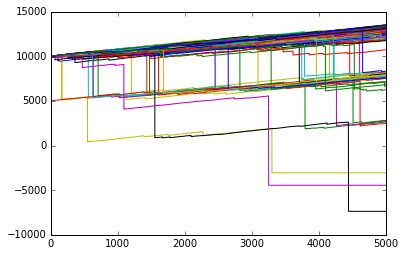

Los rieles propuestos son: [array(['joker', 'JP', 'estrella', 'naranja', 'barbar', 'estrella', 'limon',
       'limon', 'limon', 'cereza', 'estrella', 'cereza', 'bar', 'cereza',
       'campana', 'naranja', 'sandia', 'estrella', 'barbarbar', 'limon',
       'cereza', 'naranja', 'naranja'], 
      dtype='<U9'), array(['naranja', 'estrella', 'estrella', 'limon', 'naranja', 'cereza',
       'barbarbar', 'limon', 'naranja', 'campana', 'bar', 'estrella',
       'cereza', 'JP', 'sandia', 'limon', 'cereza', 'naranja', 'joker',
       'estrella', 'barbar', 'limon', 'cereza'], 
      dtype='<U9'), array(['estrella', 'cereza', 'limon', 'naranja', 'estrella', 'bar',
       'estrella', 'JP', 'limon', 'naranja', 'naranja', 'barbarbar',
       'limon', 'campana', 'sandia', 'limon', 'estrella', 'joker',
       'cereza', 'barbar', 'cereza', 'naranja', 'cereza'], 
      dtype='<U9'), array(['cereza', 'estrella', 'cereza', 'barbar', 'bar', 'limon',
       'estrella', 'limon', 'estrella', 'limon', 'barba

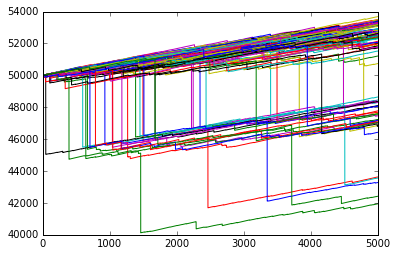

In [10]:
print("hay {} rieles propuestos".format(len(propReels)))
# Obtiene el resumen de la simulación de los primeros 5 rieles propuestos con 2 créditos iniciales distintos
for i in range(5):
    simulationSummary(propReels[i][0], propReels[i][1], 10000, 5000, 100)
    simulationSummary(propReels[i][0], propReels[i][1], 50000, 5000, 100)
    plt.show()  
